In [3]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

#### вероятности

In [ ]:
trivial_vals = [1,2] * 10

In [ ]:
plt.hist(trivial_vals, bins=[1,2,3], rwidth=0.9, density=True)
plt.xticks([1,2,3])
plt.show()

In [ ]:
all_vals = list(range(1, 21)) * 5

In [ ]:
plt.hist(all_vals, bins=[1, 11, 21], rwidth=0.9, density=True)
plt.xticks([1, 11, 21])
# plt.title('Гистограмма вероятности')
# plt.ylabel('вероятность')
plt.show()

In [ ]:
plt.hist(all_vals, bins=np.arange(1, 22, 1), rwidth=0.9, density=True)
plt.xticks(np.arange(1, 22, 1))
plt.title('Гистограмма вероятности')
plt.ylabel('вероятность')
plt.show()

#### нормальное распределение

In [2]:
np.random.seed(105)
normal_data = np.random.normal(50, 15, 10000)

mean = np.mean(normal_data)
std = np.std(normal_data)


In [3]:
print(mean, std)

49.95911813086094 15.002485870879266


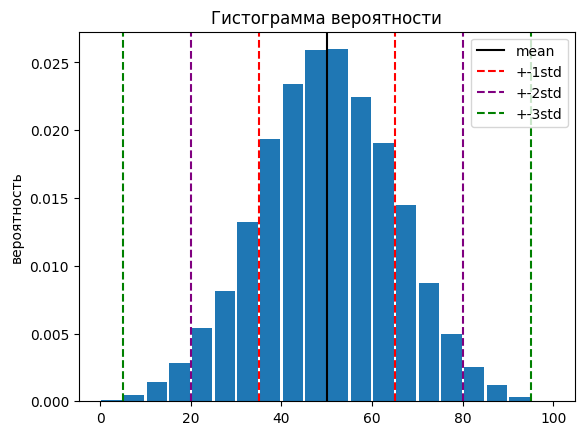

In [4]:
plt.hist(normal_data, rwidth=0.9, bins=np.arange(0, 105, 5), density=True)
plt.axvline(mean, linestyle='-', color='black', label='mean')
plt.axvline(mean+std, linestyle='--', color='red', label='+-1std')
plt.axvline(mean-std, linestyle='--', color='red')
plt.axvline(mean+std*2, linestyle='--', color='purple', label='+-2std')
plt.axvline(mean-std*2, linestyle='--', color='purple')
plt.axvline(mean+std*3, linestyle='--', color='green', label='+-3std')
plt.axvline(mean-std*3, linestyle='--', color='green')
plt.title('Гистограмма вероятности')
plt.ylabel('вероятность')
plt.legend()
plt.show()

In [5]:
len(normal_data)

10000

In [6]:
len([val for val in normal_data if val>=35 and val<65])

6800

In [7]:
len([val for val in normal_data if val>=20 and val<80])

9546

In [8]:
len([val for val in normal_data if val>=5 and val<95])

9981

#### Оценка плотности (KDE)

In [23]:
np.random.seed(105)
normal_data2 = np.random.normal(30, 10, 1000)
normal_data3 = np.random.normal(70, 10, 1000)

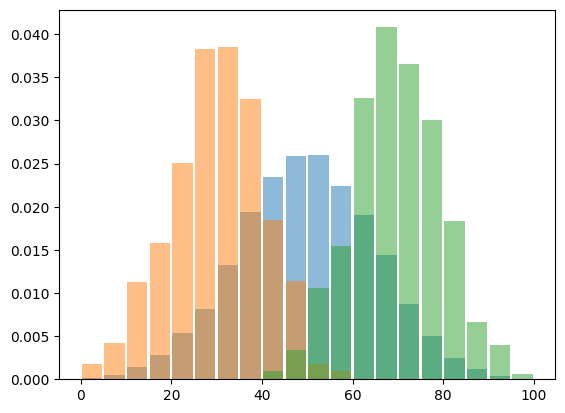

In [24]:
plt.hist(normal_data, rwidth=0.9, bins=np.arange(0, 105, 5), density=True, alpha=0.5)
plt.hist(normal_data2, rwidth=0.9, bins=np.arange(0, 105, 5), density=True, alpha=0.5)
plt.hist(normal_data3, rwidth=0.9, bins=np.arange(0, 105, 5), density=True, alpha=0.5)
plt.show()

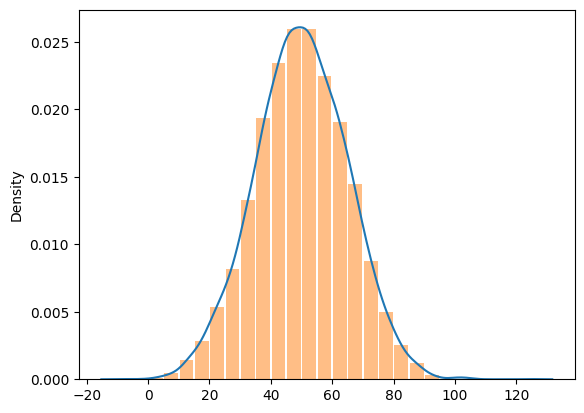

In [25]:
sns.kdeplot(normal_data)
plt.hist(normal_data, rwidth=0.9, bins=np.arange(0, 105, 5), density=True, alpha=0.5)
plt.show()

![Alt text](materials/normal-distribution-formula.png)

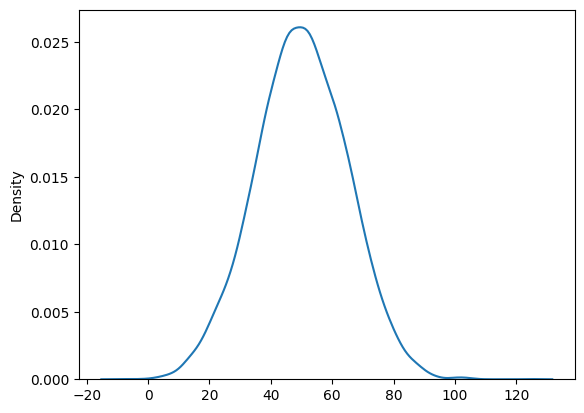

In [14]:
sns.kdeplot(normal_data)
plt.show()

In [13]:
def normal_distirbution_probability(x):
    power = -(x - mean)**2/(2*std**2)
    coef = 1 / std / np.sqrt(2*np.pi)
    probability = coef * np.exp(power)

    return probability

In [16]:
normal_distirbution_probability(50)

0.0265916463866679

#### Выборка vs Генеральная совокупность

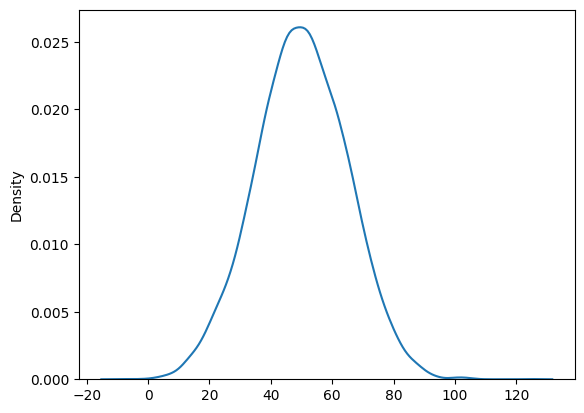

In [26]:
sns.kdeplot(normal_data)
plt.show()

In [27]:
np.random.seed(105)
sample_data = np.random.choice(normal_data, 100, False)

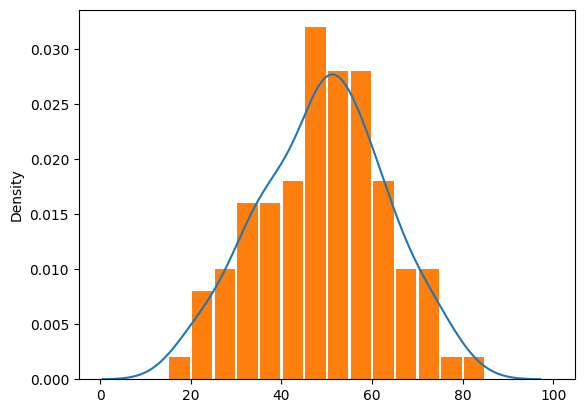

In [29]:
sns.kdeplot(sample_data)
plt.hist(sample_data, rwidth=0.9, bins=np.arange(0, 105, 5), density=True)
plt.show()

#### проверка "нормальности" данных

In [30]:
import statsmodels.api as sm

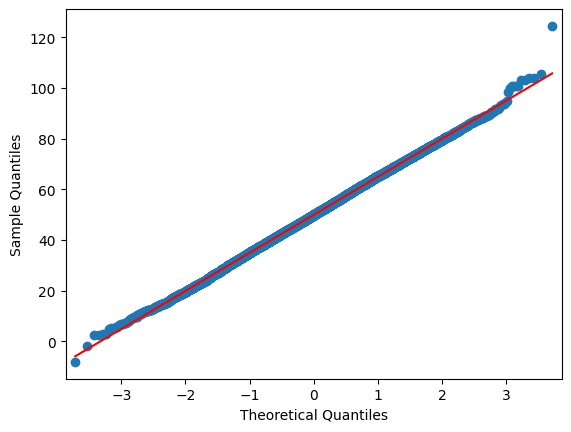

In [32]:
sm.qqplot(np.array(normal_data), line='r')
plt.show()

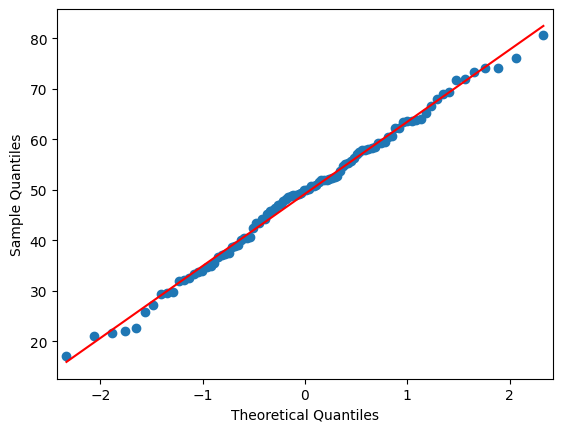

In [33]:
sm.qqplot(np.array(sample_data), line='r')
plt.show()

In [34]:
np.random.seed(105)
exp_data = np.random.exponential(100, 1000)

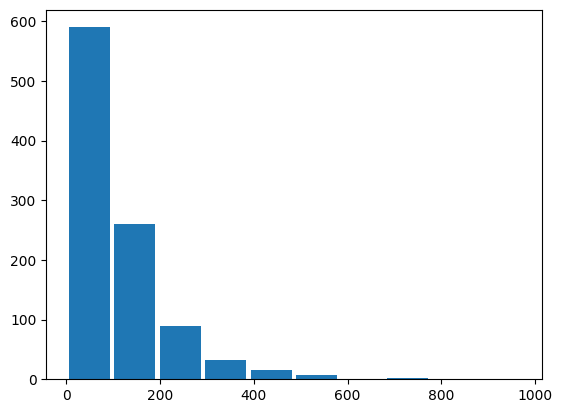

In [35]:
plt.hist(exp_data, rwidth=0.9)
plt.show()

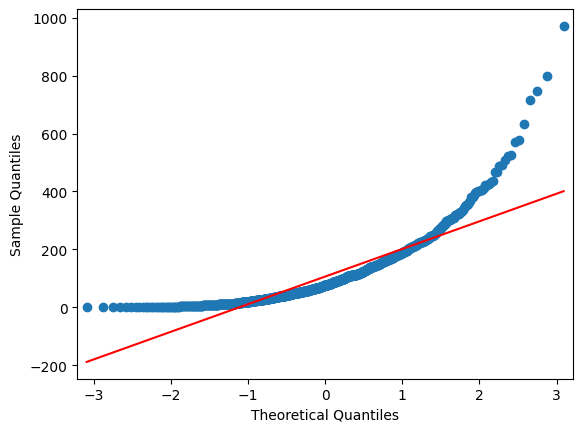

In [36]:
sm.qqplot(np.array(exp_data), line='r')
plt.show()

In [37]:
exp_data2 = np.random.uniform(-200, 0, 100).tolist() + exp_data.tolist()

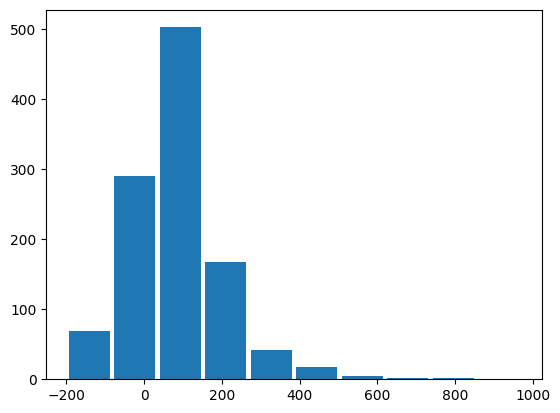

In [38]:
plt.hist(exp_data2, rwidth=0.9)
plt.show()

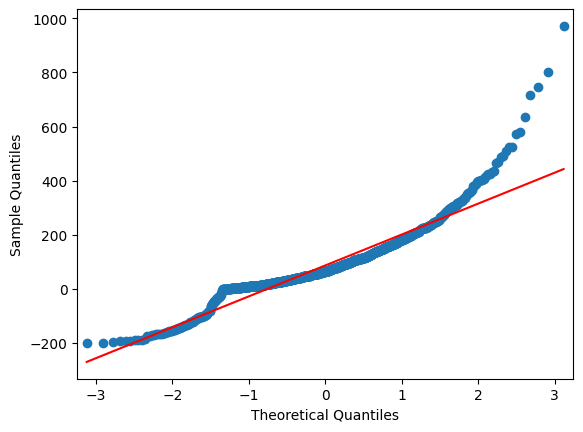

In [39]:
sm.qqplot(np.array(exp_data2), line='r')
plt.show()

In [40]:
exp_data3 = [val for val in exp_data2 if val<=20 or val>=100]

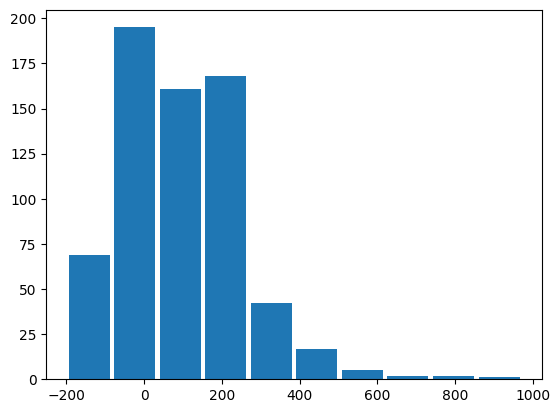

In [41]:
plt.hist(exp_data3, rwidth=0.9)
plt.show()

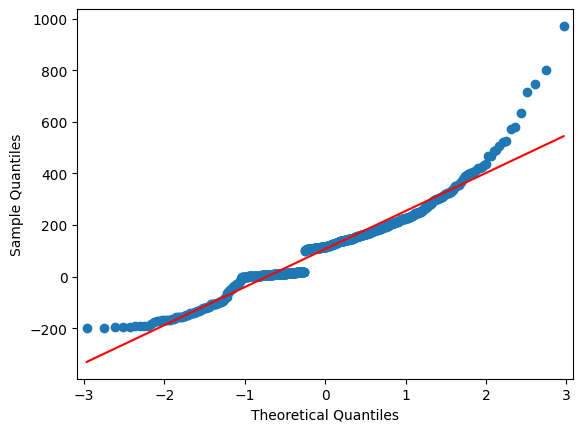

In [42]:
sm.qqplot(np.array(exp_data3), line='r')
plt.show()

#### Стандартное нормальное распределение

In [3]:
np.random.seed(105)
normal_sample = np.random.normal(5, 2, 1000)

In [5]:
std = np.std(normal_sample)
mean = np.mean(normal_sample)
print(std, mean)

2.0535375342608306 5.012316625023474


In [6]:
np.random.seed(105)
standard_normal_sample = np.random.normal(0, 1, 1000)

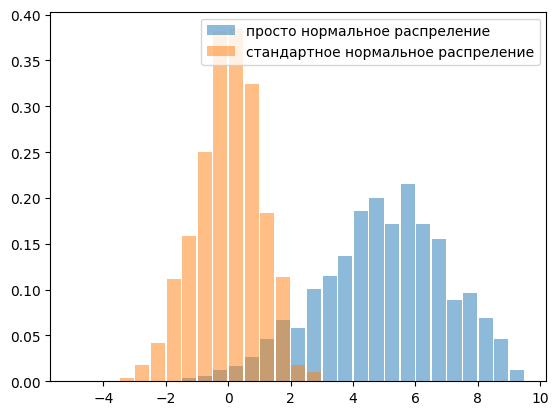

In [7]:
plt.hist(normal_sample, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='просто нормальное распреление')
plt.hist(standard_normal_sample, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='стандартное нормальное распреление')
plt.legend()
plt.show()

In [8]:
normal_sample_shifted = normal_sample - mean

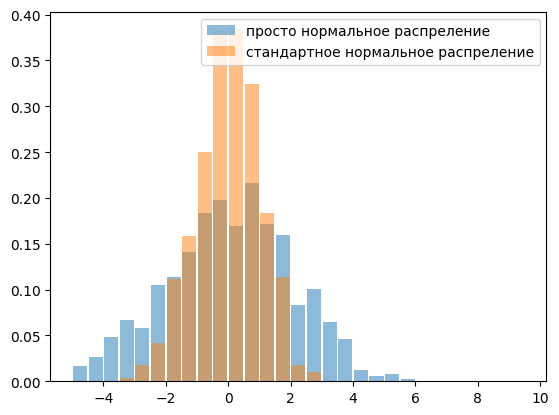

In [9]:
plt.hist(normal_sample_shifted, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='просто нормальное распреление')
plt.hist(standard_normal_sample, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='стандартное нормальное распреление')
plt.legend()
plt.show()

In [11]:
normal_sample_scaled = normal_sample_shifted / std

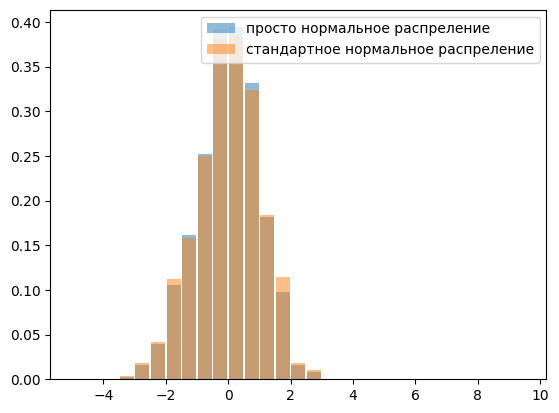

In [12]:
plt.hist(normal_sample_scaled, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='просто нормальное распреление')
plt.hist(standard_normal_sample, rwidth=0.9, density=True, bins=np.arange(-5, 10, 0.5), alpha=0.5, label='стандартное нормальное распреление')
plt.legend()
plt.show()

![Alt text](materials/standard_normal_probabilities.png)

## Краткий повтор пройденного материала

#### Меры центральной тенденции
Нужны для точечной оценки, и для сравнения двух выборок<br>
**Mean** - среднее арифметическое, будет использовать в статистических тестах. Чувствитетелен к выборсам.<br>
**Median** - не чувствительна к выбросам. При симметричных данных менее типичная оценка чем mean.<br>
**Mode** - работает с категориальными данными или мало возможных вариантов

#### Меры разброса данных
помогают оценить насколько разбросаны данные, соответсвенно насколько хороша оценка мерами центральной тенденции<br>
**размах** - включает в себя все данные, чувствителен к выбросам<br>
**межквартильный размах** - учитывает центральные данные, не чувствителен к выбросам<br>
**стандартное отклонение** - мера разброса относительно mean, так же будет использоваться в стаистических тестах

#### Визуализации
**Гистограмма** - основной способ посмотреть распределение данных<br>
**Boxplot** - помогает разом увидеть медиану, квартили, межквартильный размах, потенциальные выбросы<br>
**KDE plot** - сглаживает гистограмму до непрерывной линии. Показывает распределение вероятности.

#### Нормальное распределение
Вероятность события при нормальном распределении можно описать одной формулой, зависящей от mean и std.<br>
Эту формулу можно использовать для оценки вероятности, что и делается в статистических тестах<br>

#### Стандартное нормальное распределение
Имеет один единный вид нормального распределения. Под этот вид готовы таблицы с вероятностью распределения

![Alt text](materials/standard_normal_probabilities.png)

In [13]:
from scipy.stats import norm

mean = 0
std_dev = 1

threshold = 0.91

probability = norm.cdf(threshold, loc=mean, scale=std_dev)

print(f'При данном распределении вероятность что число будет менее {threshold}: {probability:.4f}')


При данном распределении вероятность что число будет менее 0.91: 0.8186


**Пример задачи**<br>
В местной пицерии шеф утверждает что на глаз готовит пиццу размером ровно 25см. Аналитики пиццерии утверждают что действительно размер пиццы описывается нормальным распределением со средним значением 25см и стандартным отклонением в 0.5см.<br>
Какова вероятность что нам попдается пицца менее 24см?

In [14]:
mean = 25
std_dev = 0.5

threshold = 24

probability = norm.cdf(threshold, loc=mean, scale=std_dev)

print(f'При данном распределении вероятность что пицца будет менее {threshold}см: {probability:.4f}')


При данном распределении вероятность что пицца будет менее 24см: 0.0228


Получив результаты можем ли мы утверждать что данная пицца приготовлена дургим поваром, то есть из другого распределения?<br>
Зависит от уровня значимости

**Уровень значимости**<br>
пороговое значение, используемое при проверке гипотезы для принятия решения о том, следует ли отклонить нулевую гипотезу.<br>
другими словами, минимальное значение при котором вероятность считается значимой а не случайностью.

In [17]:
0.0228 < 0.05

True

In [18]:
0.0228 < 0.01

False

In [15]:
mean = 25
std_dev = 0.5

threshold = 25.5

probability = 1 - norm.cdf(threshold, loc=mean, scale=std_dev)

print(f'При данном распределении вероятность что пицца будет более {threshold}см: {probability:.4f}')


При данном распределении вероятность что пицца будет более 25.5см: 0.1587


#### центральная предельная теорема

гласит, что при достаточно большом объеме выборки, распределение средних значений из этой выборки будет приближаться к нормальному распределению, независимо от формы исходного распределения.

In [149]:
np.random.seed(105)
random_data = (np.random.random(1000) * 100).tolist() + np.random.exponential(5, 200).tolist() + np.random.normal(80, 20, 500).tolist()

In [150]:
np.mean(random_data)

54.77171853691253

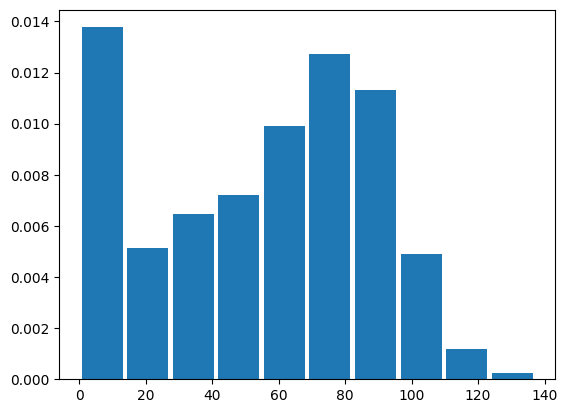

In [151]:
plt.hist(random_data, rwidth=0.9, density=True)
plt.show()

In [152]:
len(random_data)

1700

In [153]:
sample_data = np.random.choice(random_data, 100)
np.mean(sample_data)

58.2063709370438

In [154]:
collected_means = []

for i in range(1000):
    sample_data = np.random.choice(random_data, 100)
    sample_mean = np.mean(sample_data)
    collected_means.append(sample_mean)

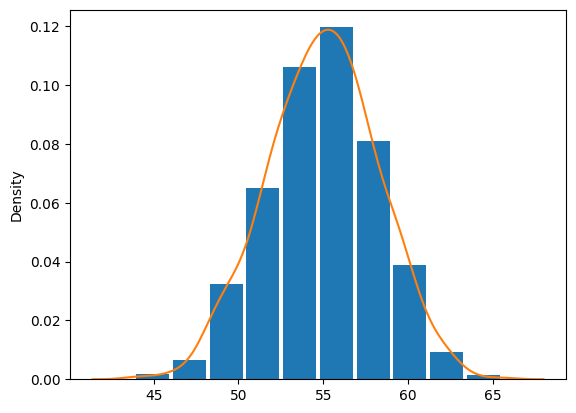

In [155]:
plt.hist(collected_means, rwidth=0.9, density=True)
sns.kdeplot(collected_means)
plt.show()

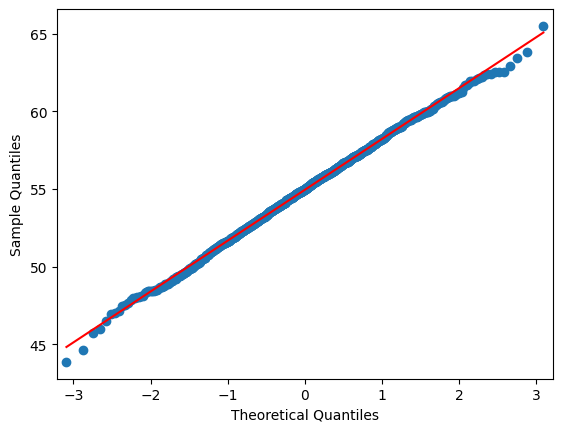

In [156]:
sm.qqplot(np.array(collected_means), line='r')
plt.show()

При чем среднее этого **распределения** равна среднему изначальной **ген. совокупности**<br>
А стандартное отклонение этого **распределения** равно стандартное отклонение **выборки** деленная на${\sqrt{n}}$

In [157]:
np.mean(collected_means), np.mean(random_data)

(54.95368536405775, 54.77171853691253)

In [158]:
np.std(collected_means), np.std(sample_data, ddof=1) / np.sqrt(100)

(3.2590249324044445, 3.3446954646032894)

**Пример**<br>
С города собрали 100 людей, известен их возраст. Нам говорят что средний возраст в этом городе 40 лет. Оцените насколько это вероятно при заданных значениях возраста

In [160]:
np.random.seed(105)
city_ages = [np.floor(i) for i in np.random.uniform(10, 80, 100000)]
sample_ages = np.random.choice(city_ages, 100)

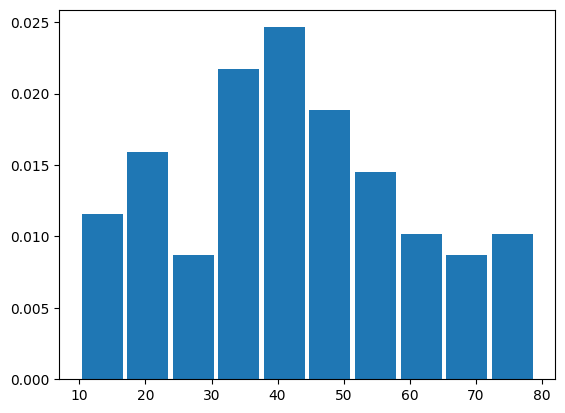

In [161]:
plt.hist(sample_ages, density=True, rwidth=0.9)
plt.show()

In [162]:
sample_mean = np.mean(sample_ages)
sample_std = np.std(sample_ages, ddof=1)

norm_dist_std = sample_std / np.sqrt(100)

In [163]:
norm_dist_std, sample_mean

(1.8011118900290566, 41.94)

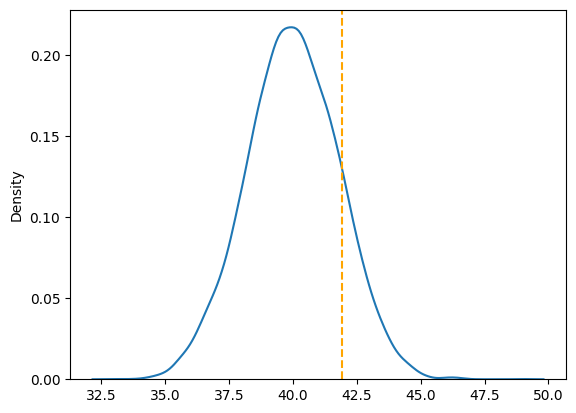

In [164]:
np.random.seed(105)
demonstration_list = np.random.normal(40, norm_dist_std, 10000)
sns.kdeplot(demonstration_list)
plt.axvline(sample_mean, linestyle='--', color='orange')
plt.show()

In [165]:
mean = 40
std_dev = norm_dist_std

threshold = sample_mean

probability = 1- norm.cdf(threshold, loc=mean, scale=std_dev)

print(f'Шанс получить выборку со средним значением {threshold} и выше составляет: {probability:.4f}')


Шанс получить выборку со средним значением 41.94 и выше составляет: 0.1407


#### доверительный интервал
Доверительный интервал — это интервал, в пределах которого, с определенной вероятностью (уровнем доверия), можно ожидать нахождение истинного значения.<br>
Уровень доверия задается аналитиком

**Простой пример**<br>
Дано нормальное распределение с центром в 100 и стандартным отклонением 5. Нужно найти доверительный интервал с уровнем доверия 95% для значений данного распределения.

In [13]:
np.random.seed(105)
trivial_example = np.random.normal(100, 5, 1000)

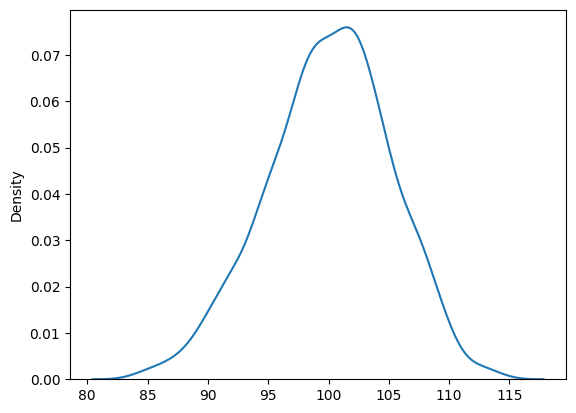

In [14]:
sns.kdeplot(trivial_example)
plt.show()

In [24]:
ul = norm.ppf(0.975, 100, 5)
ll = norm.ppf(0.025, 100, 5)
(ul, ll)

(109.79981992270027, 90.20018007729973)

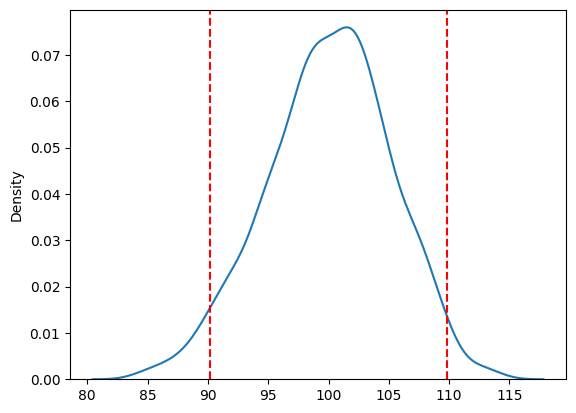

In [27]:
sns.kdeplot(trivial_example)
plt.axvline(ul, linestyle='--', color='red')
plt.axvline(ll, linestyle='--', color='red')
plt.show()

#### точечная оценка
Точечная оценка — это процесс использования выборочных данных для расчета одного конкретного значения, которое служит оценкой неизвестного параметра генеральной совокупности.<br>
Однако, точечная оценка не предоставляет информацию о том, насколько точна или надежна эта оценка.

**Пример**<br>
Вы доезжаете домой с работы и засекаете сколько времени у вас занял путь. Так вы проехали 50 раз. Затем на 51ый раз вам звонят с дома и спрашивают через сколько вас ждать?

In [4]:
np.random.seed(105)
travel_time = np.random.gamma(150, 0.2, 50)

In [5]:
norm_dist_std = np.std(travel_time, ddof=1) / np.sqrt(len(travel_time))
mean = np.mean(travel_time)
print(norm_dist_std, mean)

0.4363269669643673 30.18779052050835


In [168]:
# Точечная оценка
np.mean(travel_time)

30.18779052050835

In [169]:
# Точечная оценка
np.median(travel_time)

29.84986114689545

**что же касается доверительного инетрвала?**

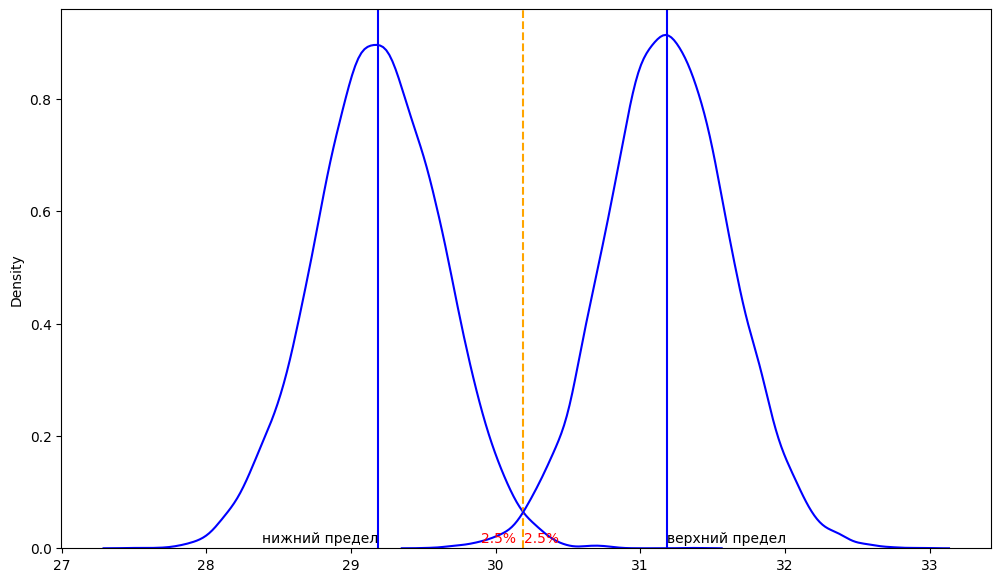

In [7]:
np.random.seed(105)
plt.figure(figsize=(12, 7))
demonstration_list1 = np.random.normal(mean-1, norm_dist_std, 10000)
demonstration_list2 = np.random.normal(mean+1, norm_dist_std, 10000)

sns.kdeplot(demonstration_list1, color='blue')

plt.axvline(mean, linestyle='--', color='orange')
plt.axvline(mean-1, linestyle='-', color='blue')
plt.text(30.2, 0.01, '2.5%', fontsize=10, color='red')
plt.text(mean-1.8, 0.01, 'нижний предел', fontsize=10, color='black')

sns.kdeplot(demonstration_list2, color='blue')
plt.axvline(mean+1, linestyle='-', color='blue')
plt.text(29.9, 0.01, '2.5%', fontsize=10, color='red')
plt.text(mean+1, 0.01, 'верхний предел', fontsize=10, color='black')

plt.show()

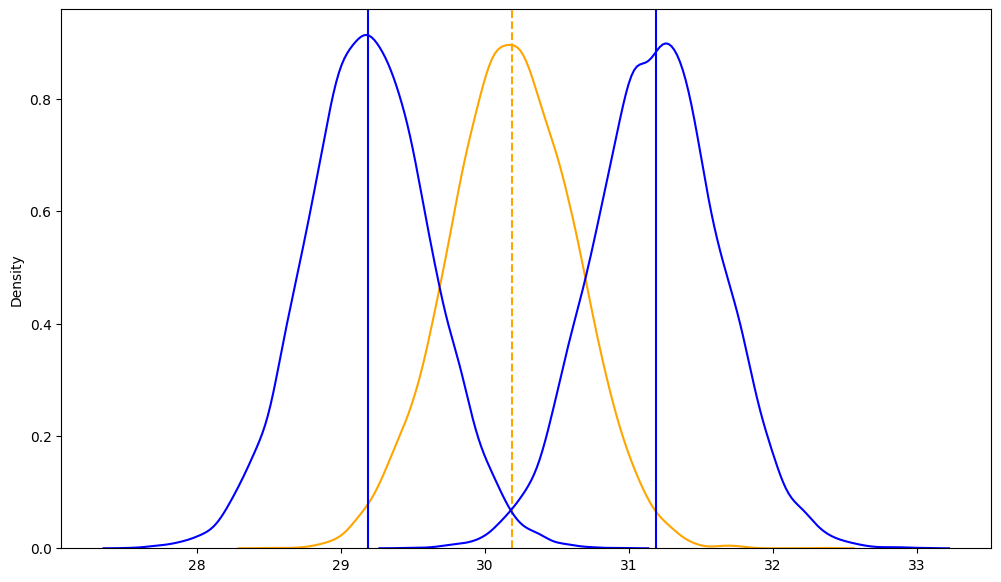

In [14]:
np.random.seed(105)
plt.figure(figsize=(12, 7))
demonstration_list = np.random.normal(mean, norm_dist_std, 10000)
demonstration_list1 = np.random.normal(mean-1, norm_dist_std, 10000)
demonstration_list2 = np.random.normal(mean+1, norm_dist_std, 10000)

sns.kdeplot(demonstration_list, color='orange')
plt.axvline(mean, linestyle='--', color='orange')

sns.kdeplot(demonstration_list1, color='blue')
plt.axvline(mean-1, linestyle='-', color='blue')

sns.kdeplot(demonstration_list2, color='blue')
plt.axvline(mean+1, linestyle='-', color='blue')

plt.show()

In [11]:
# доверительный интервал
ul = norm.ppf(0.975, mean, norm_dist_std)
ll = norm.ppf(0.025, mean, norm_dist_std)
print(ul, ll)

31.04297566124211 29.33260537977459


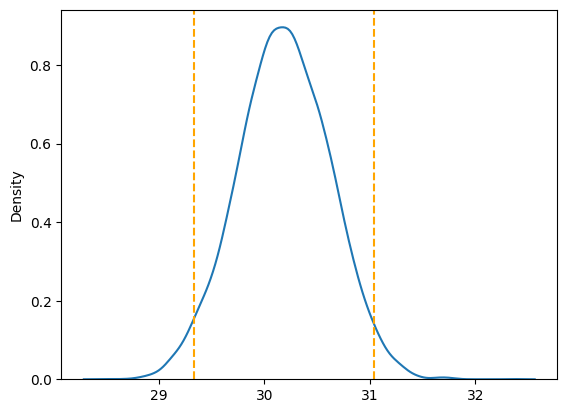

In [12]:
np.random.seed(105)
demonstration_list = np.random.normal(mean, norm_dist_std, 10000)
sns.kdeplot(demonstration_list)
plt.axvline(ul, linestyle='--', color='orange')
plt.axvline(ll, linestyle='--', color='orange')
plt.show()

#### t-распределение
Похоже на нормальное, при размере выборки более 30 - почти неотличимы<br>
Определяется средним, стандартным отклонением и степенью свободы

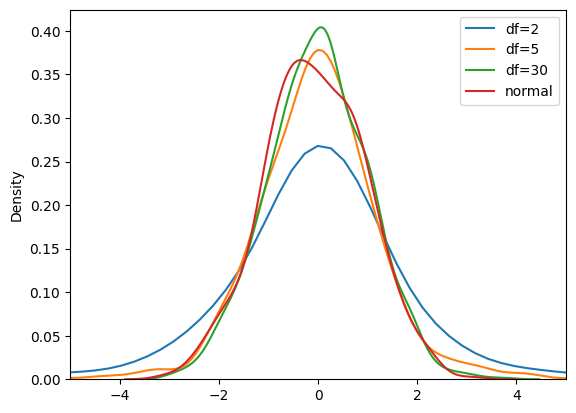

In [186]:
np.random.seed(105)

student1 = np.random.standard_t(2, 1000)
student5 = np.random.standard_t(5, 1000)
student30 = np.random.standard_t(30, 1000)
st_normal = np.random.standard_normal(1000)

sns.kdeplot(student1, label='df=2')
sns.kdeplot(student5, label='df=5')
sns.kdeplot(student30, label='df=30')
sns.kdeplot(st_normal, label='normal')
plt.legend()
plt.xlim(-5, 5)
plt.show()

In [175]:
from scipy.stats import t

In [176]:
t.cdf(25, 30, 30, 5)

0.16265430771301492

In [177]:
t.ppf(0.975, 25, 30, 5), t.ppf(0.025, 25, 30, 5)

(40.29769276376647, 19.702307236233526)

**Пример**
Вы доезжаете домой с работы и засекаете сколько времени у вас занял путь. Так вы проехали 10 раз. Затем на 11ый раз вам звонят с дома и спрашивают через сколько вас ждать?

In [187]:
np.random.seed(105)
travel_time = np.random.gamma(150, 0.2, 10)

In [192]:
t_dist_std = np.std(travel_time, ddof=1) / np.sqrt(len(travel_time))
mean = np.mean(travel_time)
dof = len(travel_time) - 1
print(t_dist_std, mean, dof)

0.4910560351709279 29.981016408235888 9


In [189]:
# Точечная оценка
np.mean(travel_time)

29.981016408235888

In [190]:
# Точечная оценка
np.median(travel_time)

29.528064121642515

In [194]:
# доверительный интервал
ul = t.ppf(0.975, dof,  mean, t_dist_std)
ll = t.ppf(0.025, dof, mean, t_dist_std)
print(ul, ll)

31.091862335504995 28.87017048096678
